<a href="https://colab.research.google.com/github/Vishaditi/SMS-spam/blob/main/spam_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np




In [3]:
df=pd.read_csv('/content/drive/MyDrive/ML project/spam.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df['Target']=encoder.fit_transform(df['Target'])

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

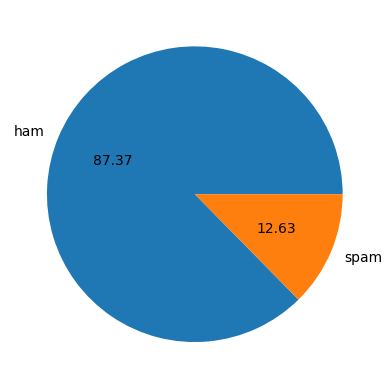

In [20]:
from matplotlib import pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['characters_len']=df['Text'].apply(len)

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_word']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,Target,Text,characters_len,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Text,characters_len,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [29]:
df['Target']=encoder.fit_transform(df['Target'])

In [30]:
df.head()

,Target,Text,characters_len,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


<Axes: xlabel='num_word', ylabel='Count'>

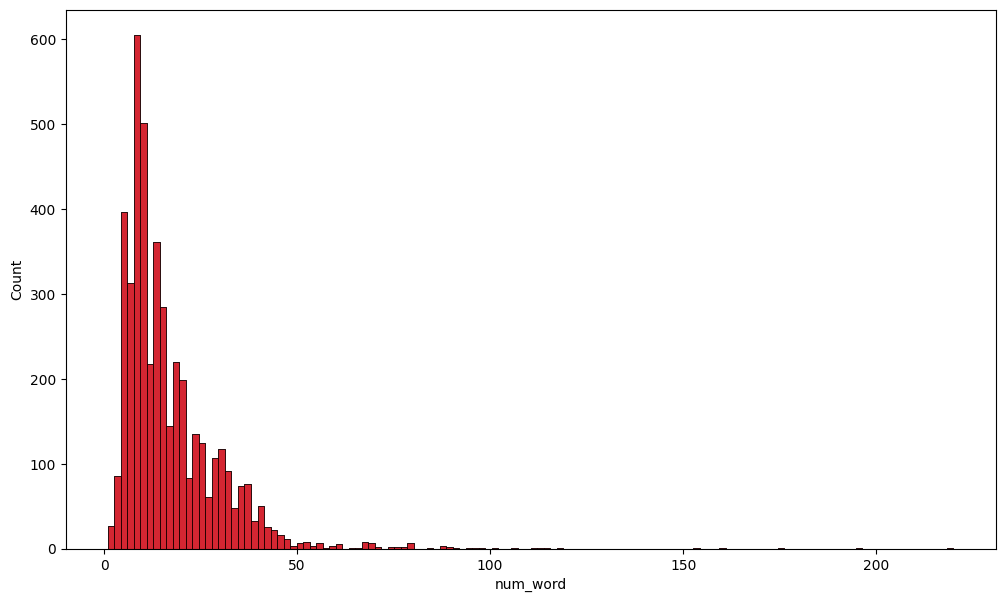

In [31]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(df[df['Target']==0]['num_word'])
sns.histplot(df[df['Target']==0]['num_word'],color='red')

<Axes: xlabel='characters_len', ylabel='Count'>

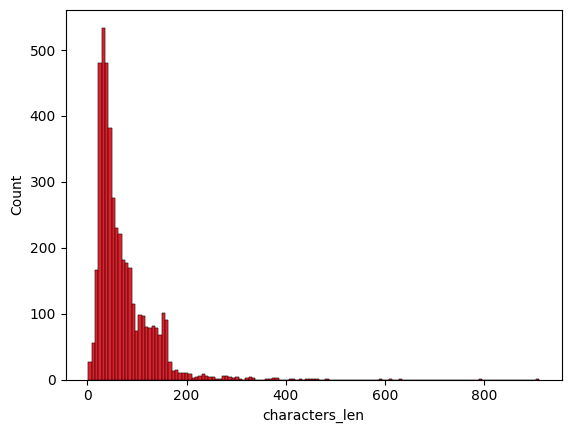

In [32]:
sns.histplot(df[df['Target']==0]['characters_len'])
sns.histplot(df[df['Target']==0]['characters_len'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

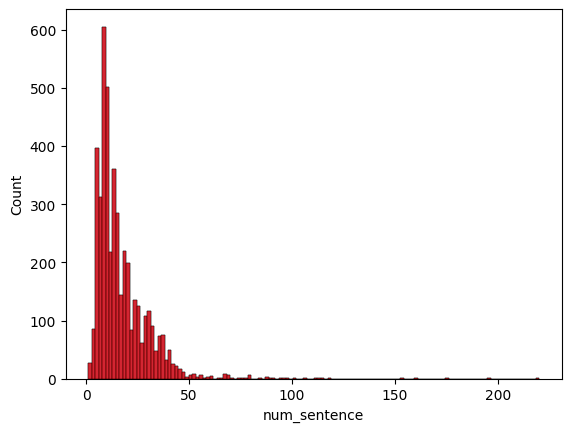

In [33]:
sns.histplot(df[df['Target']==0]['num_sentence'])
sns.histplot(df[df['Target']==0]['num_sentence'],color='red')

 Preprocessing

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
Ps=PorterStemmer()

In [37]:

def transfer(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

      text=y[:]
      y.clear()
      for i in text:
        y.append(Ps.stem(i))

  return "  ".join(y)

In [38]:
transfer('KUCH BHI TEST am me loved dancing our {} [] myself "@@ #4899 #$%^& KARTE hi')

'kuch  bhi  test  love  danc  4899  kart  hi'

In [39]:
df['transfer_Text']=df['Text'].apply(transfer)

In [40]:
df.head()

,Target,Text,characters_len,num_word,num_sentence,transfer_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color='pink')

In [42]:
spam_wc=wc.generate(df[df['Target']==1]['Text'].str.cat(sep=""))

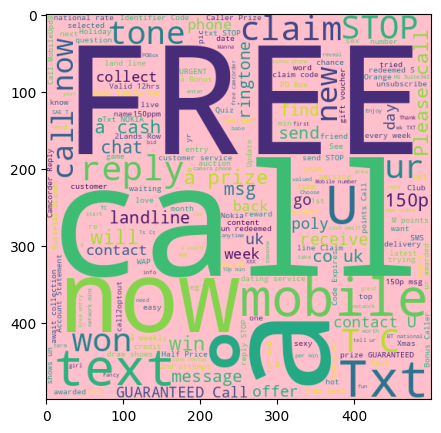

In [43]:
plt.figure(figsize=(11,5))
plt.imshow(spam_wc)

In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color='pink')

In [45]:
spam_wc=wc.generate(df[df['Target']==0]['Text'].str.cat(sep=""))

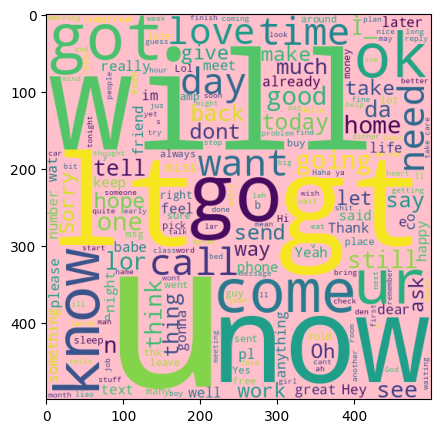

In [46]:
plt.figure(figsize=(11,5))
plt.imshow(spam_wc)

In [47]:
spam_corpus=[]
for msg in df[df['Target']==1]['transfer_Text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [48]:
len(spam_corpus)

9939

Model building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [50]:
x = cv.fit_transform(df['transfer_Text'],).toarray()

In [51]:
y=df['Target'].values
print(y)
y.shape

[0 0 1 ... 0 0 0]


(5169,)

In [52]:
x.shape

(5169, 6714)

In [53]:
y=df['Target'].values
print(y)
y.shape

[0 0 1 ... 0 0 0]


(5169,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
# importing naive bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# importing metrics and scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.svm import SVC

In [62]:
dt=DecisionTreeClassifier()

In [63]:
rf=RandomForestClassifier()

In [64]:
svm=SVC()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
gnb.fit(x_train,y_train)

GaussianNB()

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
svm.fit(x_train,y_train)

SVC()

In [69]:
y_pred1=gnb.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=svm.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix

In [77]:
print('classification report for random forest is')
print(classification_report(y_pred3,y_test))

classification report for random forest is
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       918
           1       0.83      0.98      0.90       116

    accuracy                           0.97      1034
   macro avg       0.91      0.98      0.94      1034
weighted avg       0.98      0.97      0.98      1034

